# Goal: receive sensor data from the application PhonePi

### STARTING

See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html

See https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks

See https://www.w3schools.com/python

The application PhonePi See: https://play.google.com/store/apps/details?id=com.phonepi

# HANDS ON  

* title
    * a
    * b
     * c

pip3 install flask
pip3 install flask_sockets
pip install paho-mqtt

RUN
python PhonePiPython3.py

$e^{i\pi} + 1 = 0$

# Zen of python

In [ ]:
import this

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt
costs = [1.0,4.5,9.5,16.0]
#plt.ylabel('some numbers')
#plt.plot(costs)
plt.plot([1.0, 2, 3, 4.0], costs)
plt.show()

## Sender

In [ ]:
import time
import paho.mqtt.client as paho
broker="192.168.1.6"
client= paho.Client("mqttpythonsender") #create client object client1.on_publish = on_publish #assign function to callback client1.connect(broker,port) #establish connection client1.publish("house/bulb1","on")
print("connecting to broker ",broker)
client.connect(broker)                       #connect
time.sleep(1)
print("publishing ")
client.publish("unibo/livestream","2")         #publish
time.sleep(1)
print("publishing ")
client.publish("unibo/livestream","4")         #publish
time.sleep(1)
print("publishing ")
client.publish("unibo/livestream","9")         #publish
time.sleep(1)
client.disconnect()                        #disconnect
print("bye" )

## mqttReceiver.py

connected to broker  localhost
subscribing to unibo/qak/events
first -176.9753650180429 rot 0 count 0
first -176.9753650180429 rot 0 count 1
first -176.97558358409634 rot 0 count 2
WARNING ... rot= 86.0515111264288
WARNING ... rot= 88.65011806786269
first -176.97558358409634 rot 90.92310257080538 count 36


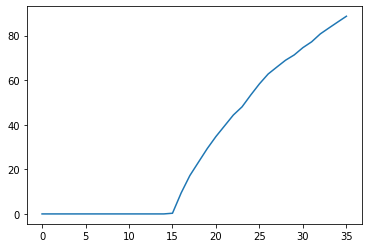

bye


In [3]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="localhost"
duration = 20
data     = []
counter  = 0
firstVal = 0
rot      = 0

def on_message(client, userdata, message) :   #define callback
    global counter, rot, data, firstVal   
    if rot > 90  : 
        client.disconnect()             #disconnect
        return    
    msg      = str( message.payload.decode("utf-8")  )
    msgitems = msg.split(",")
    value    = msgitems[5]
    v       =  float( msgitems[5] )  
    #print( v )
    if counter <= 2 :
        firstVal  = v
        rot       = 0
        print("first",firstVal, "rot", rot, "count",counter)
    rot  = abs( v -  firstVal )
    #print("rot:", rot )
    if rot < 90  :
        counter = counter + 1
        data.append( rot )  
        if rot > 85  :
        	print("WARNING ... rot=", rot )
    else :
        print("first",firstVal, "rot", rot, "count",counter)
        plt.plot(data)
        plt.show()   
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback
client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop 

   

## mqttPlotQakEvents.py

connected to broker  192.168.1.6
subscribing to unibo/qak/events


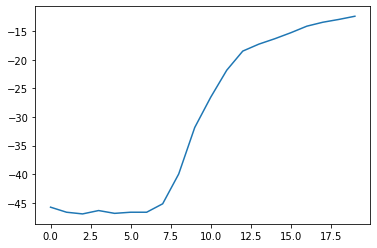

bye


In [9]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="192.168.1.6"
duration = 20
data     = []
counter  = 0 
def on_message(client, userdata, message) :   #define callback
	global counter,  data
	#msg(androidSensor,event,android,none,androidSensor(TYPE,X,Y,Z),MSGNUM)
	evMsg = str( message.payload.decode("utf-8")  )
	#print("evMsg=", evMsg )
	msgitems = evMsg.split(",")
	v        =  float( msgitems[5] ) #5 => X (AZIMUTH for rotation)
	#print("v=", v )
	if counter	< 20  :
		counter = counter + 1
		data.append( v )
	else  :
		plt.plot(data)
		plt.show()
		data = []
		counter = 0       
 	
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback
client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop        


connected to broker  192.168.1.6
subscribing to unibo/qak/events
v= -0.0020599365234375 counter= 1
v= -0.0001373291015625 counter= 2
v= -0.0005645751953125 counter= 3
v= -0.21319580078125 counter= 4
v= -0.7209014892578125 counter= 5
v= -1.1649017333984375 counter= 6
v= -0.89495849609375 counter= 7
v= -0.961334228515625 counter= 8
v= -0.7740478515625 counter= 9
v= -0.7441253662109375 counter= 10
v= -0.7302703857421875 counter= 11


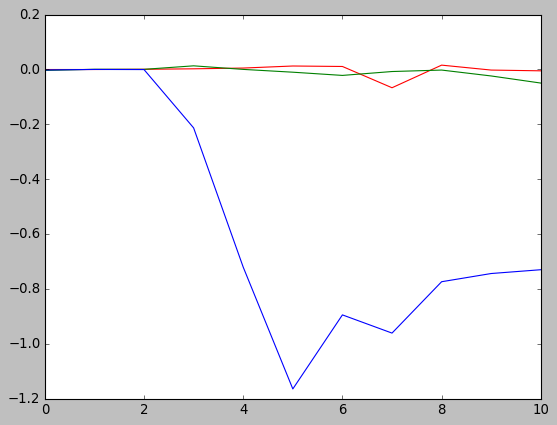

bye


In [11]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="192.168.1.6"
duration = 15
x        = []
y        = []
z        = []
counter  = 0 
maxnum   = 10
endOfJob = False
dt       = 0

plt.style.use("classic")

def on_message(client, userdata, message) :   #define callback
	global counter, maxnum, endOfJob, x, y, z
	if endOfJob  :
 		return
	counter = counter + 1
	#msg(androidSensor,event,android,none,androidSensor(TYPE,X,Y,Z),MSGNUM)
	evMsg = str( message.payload.decode("utf-8")  )
	#print("evMsg=", evMsg )
	msgitems = evMsg.split(",")
	x.append( float( msgitems[5] ) )
	v = float( msgitems[6] )
	y.append( v )
	v = float( msgitems[7].split(')')[0] )
	print("v=", v, "counter=", counter ) 
	z.append( v )
	if counter	> maxnum  :
		plt.plot(x, color='red')
		plt.plot(y, color='green')
		plt.plot(z, color='blue')
		plt.show()
		endOfJob = True  		 	
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback
client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop        
